<center>

    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Author: [Yury Kashnitsky](https://yorko.github.io). Translated and edited by [Christina Butsko](https://www.linkedin.com/in/christinabutsko/), [Yuanyuan Pao](https://www.linkedin.com/in/yuanyuanpao/), [Anastasia Manokhina](https://www.linkedin.com/in/anastasiamanokhina), Sergey Isaev, and [Artem Trunov](https://www.linkedin.com/in/datamove/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.


출처 : https://www.kaggle.com/code/bandiatindra/telecom-churn-prediction

## 1. Demonstration of main Pandas methods
Well... There are dozens of cool tutorials on Pandas and visual data analysis. If you are already familiar with these topics, you can wait for the 3rd article in the series, where we get into machine learning.  

**[Pandas](http://pandas.pydata.org)** is a Python library that provides extensive means for data analysis. Data scientists often work with data stored in table formats like `.csv`, `.tsv`, or `.xlsx`. Pandas makes it very convenient to load, process, and analyze such tabular data using SQL-like queries. In conjunction with `Matplotlib` and `Seaborn`, `Pandas` provides a wide range of opportunities for visual analysis of tabular data.

The main data structures in `Pandas` are implemented with **Series** and **DataFrame** classes. The former is a one-dimensional indexed array of some fixed data type. The latter is a two-dimensional data structure - a table - where each column contains data of the same type. You can see it as a dictionary of `Series` instances. `DataFrames` are great for representing real data: rows correspond to instances (examples, observations, etc.), and columns correspond to features of these instances.

In [1]:
import numpy as np
import pandas as pd

pd.set_option("display.precision", 2) # Sets the display precision to 2 decimal places.

In [2]:
df = pd.DataFrame({'A': [1.12345, 2.34567], 'B': [3.98765, 4.56789]})
print(df)

      A     B
0  1.12  3.99
1  2.35  4.57


We'll demonstrate the main methods in action by analyzing a [dataset](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) on the churn rate of telecom operator clients. Let's read the data (using `read_csv`), and take a look at the first 5 lines using the `head` method:

In [3]:
df = pd.read_csv("data/telecom_churn.csv")

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<details>
<summary>About printing DataFrames in Jupyter notebooks</summary>
<p>
In Jupyter notebooks, Pandas DataFrames are printed as these pretty tables seen above while `print(df.head())` is less nicely formatted.
By default, Pandas displays 20 columns and 60 rows, so, if your DataFrame is bigger, use the `set_option` function as shown in the example below:

```python
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
```
</p>
</details>

Recall that each row corresponds to one client, an **instance**, and columns are **features** of this instance.

Let’s have a look at data dimensionality, feature names, and feature types.

In [5]:
print(df.shape)

(3333, 20)


From the output, we can see that the table contains 3333 rows and 20 columns.

Now let's try printing out column names using `columns`:

In [6]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


We can use the `info()` method to output some general information about the dataframe: 

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
df.select_dtypes(include='object').columns.tolist() # select only columns of type object

['State', 'International plan', 'Voice mail plan']

In [9]:
# df_obj = list(df.columns[ df.dtypes == 'object' ])

In [10]:
df.isnull().sum() # check missing values

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

`bool`, `int64`, `float64` and `object` are the data types of our features. We see that one feature is logical (`bool`), 3 features are of type `object`, and 16 features are numeric. With this same method, we can easily see if there are any missing values. Here, there are none because each column contains 3333 observations, the same number of rows we saw before with `shape`.

We can **change the column type** with the `astype` method. Let's apply this method to the `Churn` feature to convert it into `int64`:

In [11]:
df["Churn"] = df["Churn"].astype("int64")

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

The `describe` method shows basic statistical characteristics of each numerical feature (`int64` and `float64` types): number of non-missing values, mean, standard deviation, range, median, 0.25 and 0.75 quartiles.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.06,39.82,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.18,42.37,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.10,13.69,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.78,54.47,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.44,20.07,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.56,9.26,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.98,50.71,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.11,19.92,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.08,4.31,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.87,50.57,23.20,167.00,201.20,235.30,395.00


In order to see statistics on non-numerical features, one has to explicitly indicate data types of interest in the `include` parameter.

In [14]:
df.describe(include=["object", "bool"])

,State,International plan,Voice mail plan
count,3333,3333,3333
unique,51,2,2
top,WV,No,No
freq,106,3010,2411


In [15]:
df[['International plan','Voice mail plan']].value_counts()

International plan  Voice mail plan
No                  No                 2180
                    Yes                 830
Yes                 No                  231
                    Yes                  92
Name: count, dtype: int64

In [16]:
df.head(1)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0


In [17]:
df.State.value_counts()[:5]

State
WV    106
MN     84
NY     83
AL     80
WI     78
Name: count, dtype: int64

For categorical (type `object`) and boolean (type `bool`) features we can use the `value_counts` method. Let's have a look at the distribution of `Churn`:

In [18]:
df["Churn"].value_counts()

Churn
0    2850
1     483
Name: count, dtype: int64

2850 users out of 3333 are *loyal*; their `Churn` value is `0`. To calculate fractions, pass `normalize=True` to the `value_counts` function.

In [19]:
df["Churn"].value_counts(normalize=True)

Churn
0    0.86
1    0.14
Name: proportion, dtype: float64


### Sorting

A DataFrame can be sorted by the value of one of the variables (i.e columns). For example, we can sort by *Total day charge* (use `ascending=False` to sort in descending order):


In [20]:
df.sort_values(by="Total day charge", ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
365,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,1
985,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,1
2594,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,1
156,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,1
605,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,1


We can also sort by multiple columns:

In [21]:
df.sort_values(by=["Churn", "Total day charge"], ascending=[True, False]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
688,MN,13,510,No,Yes,21,315.6,105,53.65,208.9,71,17.76,260.1,123,11.70,12.1,3,3.27,3,0
2259,NC,210,415,No,Yes,31,313.8,87,53.35,147.7,103,12.55,192.7,97,8.67,10.1,7,2.73,3,0
534,LA,67,510,No,No,0,310.4,97,52.77,66.5,123,5.65,246.5,99,11.09,9.2,10,2.48,4,0
575,SD,114,415,No,Yes,36,309.9,90,52.68,200.3,89,17.03,183.5,105,8.26,14.2,2,3.83,1,0
2858,AL,141,510,No,Yes,28,308.0,123,52.36,247.8,128,21.06,152.9,103,6.88,7.4,3,2.00,1,0


### Indexing and retrieving data

A DataFrame can be indexed in a few different ways. 

To get a single column, you can use a `DataFrame['Name']` construction. Let's use this to answer a question about that column alone: **what is the proportion of churned users in our dataframe?**

In [22]:
df["Churn"].mean()

0.14491449144914492

14.5% is actually quite bad for a company; such a churn rate can make the company go bankrupt.

**Boolean indexing** with one column is also very convenient. The syntax is `df[P(df['Name'])]`, where `P` is some logical condition that is checked for each element of the `Name` column. The result of such indexing is the DataFrame consisting only of rows that satisfy the `P` condition on the `Name` column. 

Let's use it to answer the question:

**What are average values of numerical features for churned users?**

In [23]:
df_no_obj = df.select_dtypes(exclude='object')

In [24]:
df_no_obj[df["Churn"] == 1].mean()

Account length            102.66
Area code                 437.82
Number vmail messages       5.12
Total day minutes         206.91
Total day calls           101.34
Total day charge           35.18
Total eve minutes         212.41
Total eve calls           100.56
Total eve charge           18.05
Total night minutes       205.23
Total night calls         100.40
Total night charge          9.24
Total intl minutes         10.70
Total intl calls            4.16
Total intl charge           2.89
Customer service calls      2.23
Churn                       1.00
dtype: float64

**How much time (on average) do churned users spend on the phone during daytime?**

In [25]:
df[df["Churn"] == 1]["Total day minutes"].mean()

206.91407867494823


**What is the maximum length of international calls among loyal users (`Churn == 0`) who do not have an international plan?**



In [26]:
df[(df["Churn"] == 0) & (df["International plan"] == "No")]["Total intl minutes"].max()

18.9

DataFrames can be indexed by column name (label) or row name (index) or by the serial number of a row. The `loc` method is used for **indexing by name**, while `iloc()` is used for **indexing by number**.

In the first case below, we say *"give us the values of the rows with index from 0 to 5 (inclusive) and columns labeled from State to Area code (inclusive)"*. In the second case, we say *"give us the values of the first five rows in the first three columns"* (as in a typical Python slice: the maximal value is not included).

In [27]:
df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,0


In [28]:
df.loc[0:5, "State":"Area code"]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415
5,AL,118,510


In [29]:
df.iloc[0:5, 0:3]

,State,Account length,Area code
0,KS,128,415
1,OH,107,415
2,NJ,137,415
3,OH,84,408
4,OK,75,415


If we need the first or the last line of the data frame, we can use the `df[:1]` or `df[-1:]` construct:

In [30]:
df[-1:]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.6,241.4,77,10.86,13.7,4,3.7,0,0



### Applying Functions to Cells, Columns and Rows

**To apply functions to each column, use `apply()`:**


In [31]:
df.apply(np.max)

State                        WY
Account length              243
Area code                   510
International plan          Yes
Voice mail plan             Yes
Number vmail messages        51
Total day minutes         350.8
Total day calls             165
Total day charge          59.64
Total eve minutes         363.7
Total eve calls             170
Total eve charge          30.91
Total night minutes       395.0
Total night calls           175
Total night charge        17.77
Total intl minutes         20.0
Total intl calls             20
Total intl charge           5.4
Customer service calls        9
Churn                         1
dtype: object

The `apply` method can also be used to apply a function to each row. To do this, specify `axis=1`. Lambda functions are very convenient in such scenarios. For example, if we need to select all states starting with W, we can do it like this:

In [32]:
df["State"].apply(lambda state: state[0] == "W")

0       False
1       False
2       False
3       False
4       False
        ...  
3328    False
3329     True
3330    False
3331    False
3332    False
Name: State, Length: 3333, dtype: bool

In [33]:
df[df["State"].apply(lambda state: state[0] == "W")].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0
26,WY,57,408,No,Yes,39,213.0,115,36.21,191.1,112,16.24,182.7,115,8.22,9.5,3,2.57,0,0
44,WI,64,510,No,No,0,154.0,67,26.18,225.8,118,19.19,265.3,86,11.94,3.5,3,0.95,1,0
49,WY,97,415,No,Yes,24,133.2,135,22.64,217.2,58,18.46,70.6,79,3.18,11.0,3,2.97,1,0
54,WY,87,415,No,No,0,151.0,83,25.67,219.7,116,18.67,203.9,127,9.18,9.7,3,2.62,5,1


The `map` method can be used to **replace values in a column** by passing a dictionary of the form `{old_value: new_value}` as its argument:

In [34]:
df["International plan"].value_counts()

International plan
No     3010
Yes     323
Name: count, dtype: int64

In [35]:
d = {"No": False, "Yes": True}
df["International plan"] = df["International plan"].map(d)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [36]:
df["International plan"].value_counts()

International plan
False    3010
True      323
Name: count, dtype: int64

The same thing can be done with the `replace` method:

In [37]:
df = df.replace({"Voice mail plan": d})
# df["Voice mail plan"].value_counts()
df["Voice mail plan"].value_counts().infer_objects(copy=False)

/var/folders/y0/xmqglxpd07bcj0th06zn09nh0000gn/T/ipykernel_86251/1130013552.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Voice mail plan": d})


Voice mail plan
False    2411
True      922
Name: count, dtype: int64


### Grouping

In general, grouping data in Pandas works as follows:



```python
df.groupby(by=grouping_columns)[columns_to_show].function()
```


1. First, the `groupby` method divides the `grouping_columns` by their values. They become a new index in the resulting dataframe.
2. Then, columns of interest are selected (`columns_to_show`). If `columns_to_show` is not included, all non groupby clauses will be included.
3. Finally, one or several functions are applied to the obtained groups per selected columns.

Here is an example where we group the data according to the values of the `Churn` variable and display statistics of three columns in each group:

In [38]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

df.groupby(["Churn"])[columns_to_show].describe(percentiles=[]).T

Churn                            0       1
Total day minutes   count  2850.00  483.00
                    mean    175.18  206.91
                    std      50.18   69.00
                    min       0.00    0.00
                    50%     177.20  217.60
                    max     315.60  350.80
Total eve minutes   count  2850.00  483.00
                    mean    199.04  212.41
                    std      50.29   51.73
                    min       0.00   70.90
                    50%     199.60  211.30
                    max     361.80  363.70
Total night minutes count  2850.00  483.00
                    mean    200.13  205.23
                    std      51.11   47.13
                    min      23.20   47.40
                    50%     200.25  204.80
                    max     395.00  354.90

In [39]:
print(df[columns_to_show].dtypes)

Total day minutes      float64
Total eve minutes      float64
Total night minutes    float64
dtype: object


In [40]:
df["Total eve minutes"].value_counts()

Total eve minutes
169.9    9
167.2    7
180.5    7
201.0    7
161.7    7
        ..
75.3     1
293.9    1
232.8    1
173.2    1
265.9    1
Name: count, Length: 1611, dtype: int64

Let’s do the same thing, but slightly differently by passing a list of functions to `agg()`:

In [41]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

# df.groupby(["Churn"])[columns_to_show].agg([np.mean, np.std, np.min, np.max])
df.groupby(["Churn"])[columns_to_show].agg(['mean', 'std', 'min', 'max']).T

Churn                          0       1
Total day minutes   mean  175.18  206.91
                    std    50.18   69.00
                    min     0.00    0.00
                    max   315.60  350.80
Total eve minutes   mean  199.04  212.41
                    std    50.29   51.73
                    min     0.00   70.90
                    max   361.80  363.70
Total night minutes mean  200.13  205.23
                    std    51.11   47.13
                    min    23.20   47.40
                    max   395.00  354.90


### Summary tables

Suppose we want to see how the observations in our sample are distributed in the context of two variables - `Churn` and `International plan`. To do so, we can build a **contingency table** using the `crosstab` method:



In [42]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,False,True
Churn,,
0,2664,186
1,346,137


In [43]:
pd.crosstab(df["Churn"], df["Voice mail plan"], normalize=True)

Voice mail plan,False,True
Churn,,
0,0.60,0.25
1,0.12,0.02


We can see that most of the users are loyal and do not use additional services (International Plan/Voice mail).

This will resemble **pivot tables** to those familiar with Excel. And, of course, pivot tables are implemented in Pandas: the `pivot_table` method takes the following parameters:

* `values` – a list of variables to calculate statistics for,
* `index` – a list of variables to group data by,
* `aggfunc` – what statistics we need to calculate for groups, ex. sum, mean, maximum, minimum or something else.

Let's take a look at the average number of day, evening, and night calls by area code:

In [44]:
df.pivot_table(
    ["Total day calls", "Total eve calls", "Total night calls"],
    ["Area code"],
    aggfunc="mean",
)

,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.50,99.79,99.04
415,100.58,100.50,100.40
510,100.10,99.67,100.60



### DataFrame transformations

Like many other things in Pandas, adding columns to a DataFrame is doable in many ways.

For example, if we want to calculate the total number of calls for all users, let's create the `total_calls` Series and paste it into the DataFrame:



In [45]:
total_calls = (
    df["Total day calls"]
    + df["Total eve calls"]
    + df["Total night calls"]
    + df["Total intl calls"]
)
total_calls[:5]

0    303
1    332
2    333
3    255
4    359
dtype: int64

In [46]:
df.insert(loc=len(df.columns), column="Total calls", value=total_calls)
# loc parameter is the number of columns after which to insert the Series object
# we set it to len(df.columns) to paste it at the very end of the dataframe
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,303
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,332
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,333
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,255
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,359


It is possible to add a column more easily without creating an intermediate Series instance:

In [47]:
df["Total charge"] = (
    df["Total day charge"]
    + df["Total eve charge"]
    + df["Total night charge"]
    + df["Total intl charge"]
)
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total calls,Total charge
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,244.7,91,11.01,10.0,3,2.70,1,0,303,75.56
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,254.4,103,11.45,13.7,3,3.70,1,0,332,59.24
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,162.6,104,7.32,12.2,5,3.29,0,0,333,62.29
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,196.9,89,8.86,6.6,7,1.78,2,0,255,66.80
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,186.9,121,8.41,10.1,3,2.73,3,0,359,52.09


To delete columns or rows, use the `drop` method, passing the required indexes and the `axis` parameter (`1` if you delete columns, and nothing or `0` if you delete rows). The `inplace` argument tells whether to change the original DataFrame. With `inplace=False`, the `drop` method doesn't change the existing DataFrame and returns a new one with dropped rows or columns. With `inplace=True`, it alters the DataFrame.

In [48]:
# get rid of just created columns
df.drop(["Total charge", "Total calls"], axis=1, inplace=True)

In [49]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [50]:
# and here’s how you can delete rows
df.drop([1, 2]).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,True,False,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,False,True,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0


In [51]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## 2. First attempt at predicting telecom churn


Let's see how churn rate is related to the *International plan* feature. We'll do this using a `crosstab` contingency table and also through visual analysis with `Seaborn` (however, visual analysis will be covered more thoroughly in the next article).


In [52]:
df['International plan'].value_counts()

International plan
False    3010
True      323
Name: count, dtype: int64

In [53]:
pd.crosstab(df["Churn"], df["International plan"], margins=True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


In [54]:
# !conda install seaborn -y

In [55]:
# some imports to set up plotting
import matplotlib.pyplot as plt
# pip install seaborn
import seaborn as sns

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

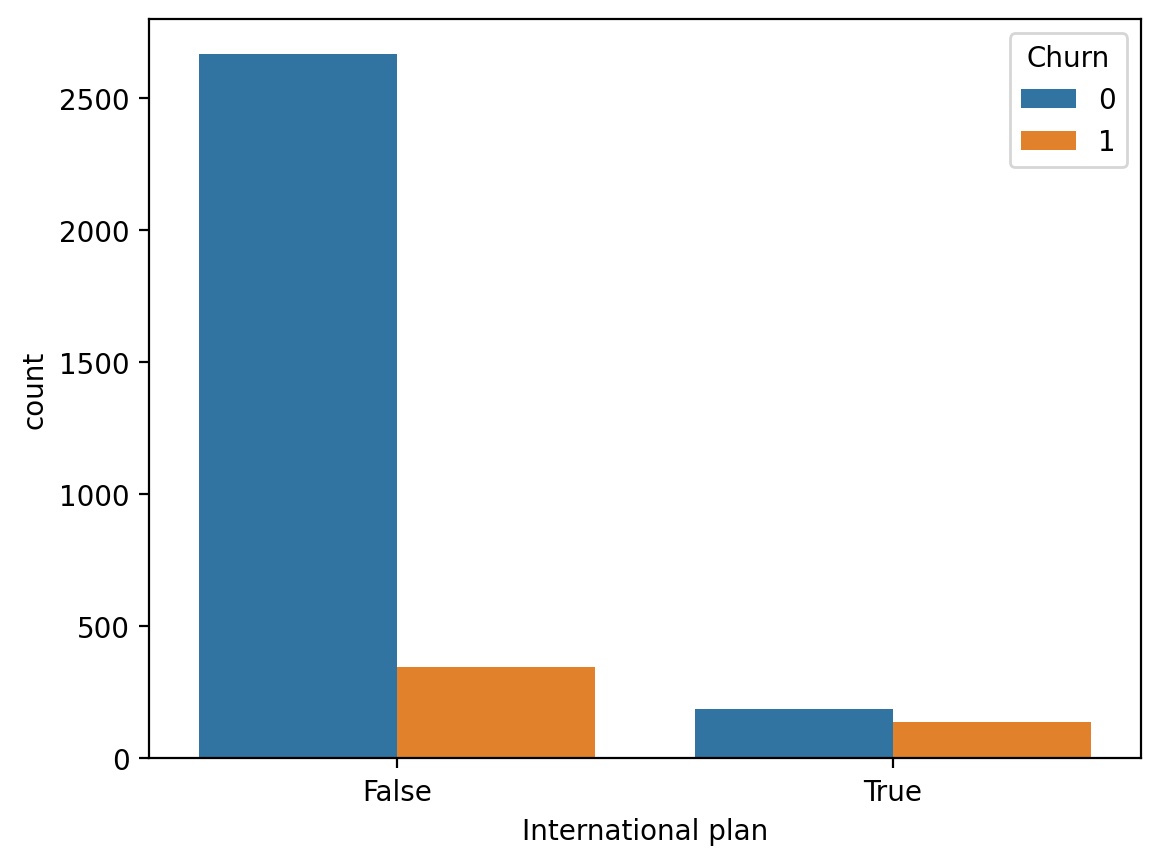

In [56]:
sns.countplot(x="International plan", hue="Churn", data=df);


We see that, with *International Plan*, the churn rate is much higher, which is an interesting observation! Perhaps large and poorly controlled expenses with international calls are very conflict-prone and lead to dissatisfaction among the telecom operator's customers.

Next, let's look at another important feature – *Customer service calls*. Let's also make a summary table and a picture.

In [57]:
import scipy.stats as stats

data = pd.DataFrame({
    'International plan': ['False', 'True'],
    'Churn=0': [2664, 186],
    'Churn=1': [346, 137]
})
data.set_index('International plan', inplace=True)
data

,Churn=0,Churn=1
International plan,,
False,2664,346
True,186,137


In [58]:
# Chi-square 
chi2, p, dof, expected = stats.chi2_contingency(data)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-square statistic: 222.5657566499376
p-value: 2.4931077033159546e-50
Degrees of freedom: 1
Expected frequencies:
 [[2573.80738074  436.19261926]
 [ 276.19261926   46.80738074]]


### Interpreting the Chi-square Test Results

**What the test tells us:**
- **Chi-square statistic (222.57)**: Measures how far the observed counts deviate from what we'd expect if International plan and Churn were independent. Larger values = stronger association.
- **p-value (2.49 × 10⁻⁵⁰ ≈ 0)**: The probability of seeing this or a more extreme result if the two variables were truly independent. Since p << 0.001, we **reject independence** — International plan and Churn are strongly associated.
- **Degrees of freedom (1)**: For a 2×2 table: df = (rows - 1) × (cols - 1) = (2-1) × (2-1) = 1.
- **Expected frequencies**: What we'd see if International plan and Churn were independent:
  - Expected count for each cell = (row total × column total) / grand total
  - E.g., False & Churn=0 expected: (3010 × 2850) / 3333 ≈ 2574

**Practical effect-size (how strong is the association?):**
- **Risk of churn with International plan = True**: 137 / 323 ≈ 42.4%
- **Risk of churn with International plan = False**: 346 / 3010 ≈ 11.5%
- **Relative risk**: 42.4% / 11.5% ≈ **3.7×** — customers with the international plan are ~3.7 times more likely to churn.
- **Odds ratio**: (137×2664) / (186×346) ≈ **5.7** — odds of churn are ~5.7 times higher for customers with the international plan.

**Key takeaway**: There's overwhelming statistical evidence (p ≈ 0) that International plan is associated with churn, and the effect is large (RR ≈ 3.7). However, association ≠ causation — perhaps customers who choose international plans have different usage patterns or expectations that lead to higher churn. For causal inference or adjusted analysis, use logistic regression to control for confounders like `Customer service calls`.

In [59]:
pd.crosstab(df["Churn"], df["Customer service calls"], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


<Axes: xlabel='Customer service calls', ylabel='count'>

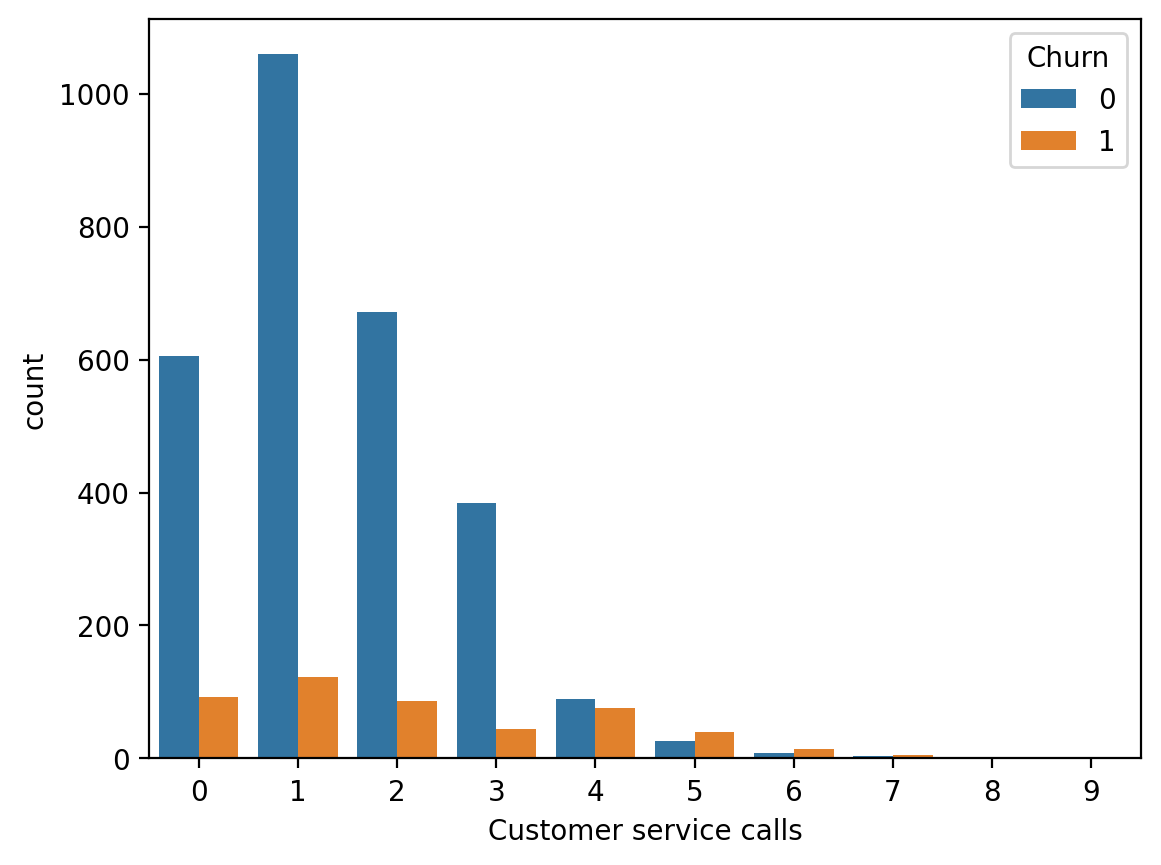

In [60]:
sns.countplot(x="Customer service calls", hue="Churn", data=df)

Although it's not so obvious from the summary table, it's easy to see from the above plot that the churn rate increases sharply from 4 customer service calls and above.

Now let's add a binary feature to our DataFrame – `Customer service calls > 3`. And once again, let's see how it relates to churn. 

In [61]:
df["Many_service_calls"] = (df["Customer service calls"] > 3).astype("int")

pd.crosstab(df["Many_service_calls"], df["Churn"], margins=True)

Churn,0,1,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


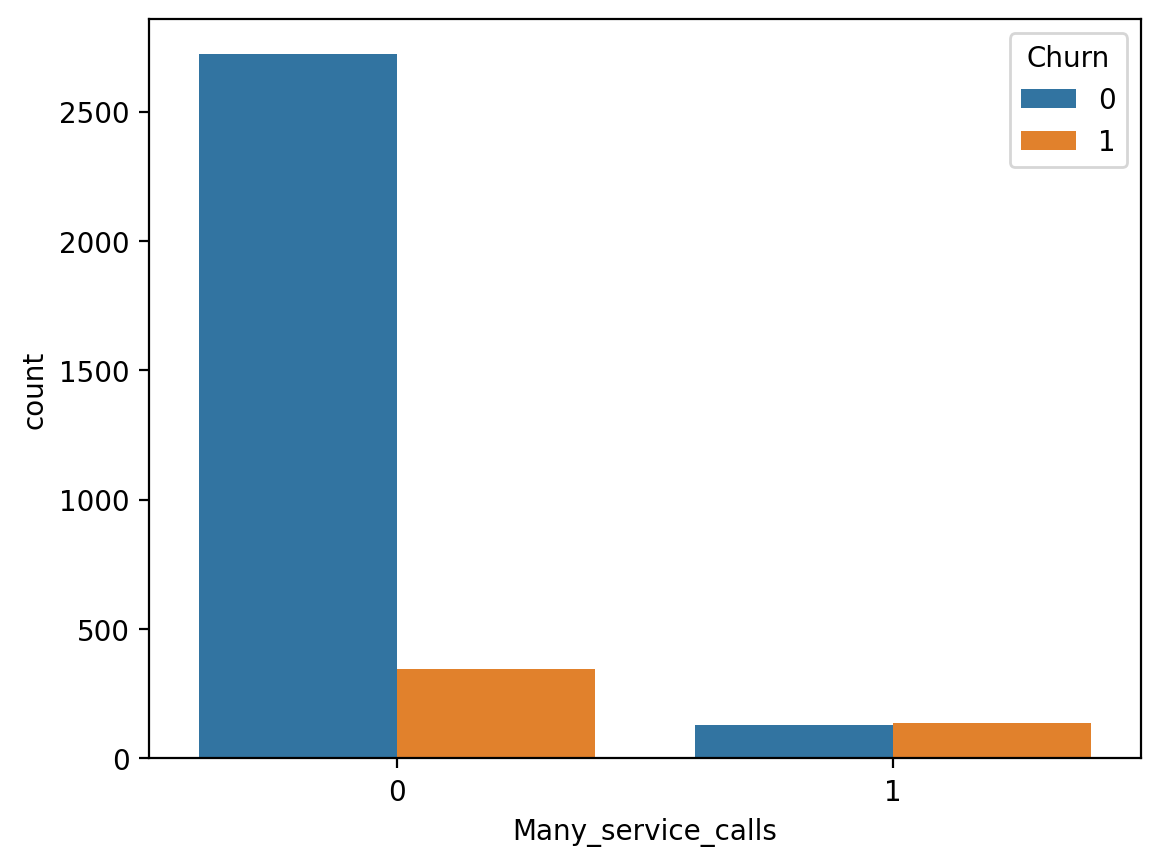

In [62]:
sns.countplot(x="Many_service_calls", hue="Churn", data=df);


Let's construct another contingency table that relates *Churn* with both *International plan* and freshly created *Many_service_calls*.



In [63]:
pd.crosstab(df["Many_service_calls"] & df["International plan"], df["Churn"])

Churn,0,1
row_0,,
False,2841,464
True,9,19


Therefore, predicting that a customer is not loyal (*Churn*=1) in the case when the number of calls to the service center is greater than 3 and the *International Plan* is added (and predicting *Churn*=0 otherwise), we might expect an accuracy of 85.8% (we are mistaken only 464 + 9 times). This number, 85.8%, that we got through this very simple reasoning serves as a good starting point (*baseline*) for the further machine learning models that we will build. 

As we move on in this course, recall that, before the advent of machine learning, the data analysis process looked something like this. Let's recap what we've covered:
    
- The share of loyal clients in the sample is 85.5%. The most naive model that always predicts a "loyal customer" on such data will guess right in about 85.5% of all cases. That is, the proportion of correct answers (*accuracy*) of subsequent models should be no less than this number, and will hopefully be significantly higher;
- With the help of a simple forecast that can be expressed by the following formula: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", we can expect a guessing rate of 85.8%, which is just above 85.5%. Subsequently, we'll talk about decision trees and figure out how to find such rules **automatically** based only on the input data;
- We got these two baselines without applying machine learning, and they'll serve as the starting point for our subsequent models. If it turns out that with enormous effort, we increase the share of correct answers by 0.5% per se, then possibly we are doing something wrong, and it suffices to confine ourselves to a simple model with two conditions;
- Before training complex models, it is recommended to manipulate the data a bit, make some plots, and check simple assumptions. Moreover, in business applications of machine learning, they usually start with simple solutions and then experiment with more complex ones.


## 3. Catboost Classifier 

- [conda install catboost](https://catboost.ai/)


In [64]:
!conda install -y catboost

Channels:
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [65]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [66]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Many_service_calls
0,KS,128,415,False,True,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,0
1,OH,107,415,False,True,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,0
2,NJ,137,415,False,False,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,OH,84,408,True,False,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,0
4,OK,75,415,True,False,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,0


### Augmentation

- SMOTENC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTENC.html

In [67]:
# !pip install imblearn

In [68]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

In [69]:
df_smt = df.copy()
df_smt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   bool   
 4   Voice mail plan         3333 non-null   bool   
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [70]:
y = df_smt.pop("Churn")
X = df_smt

In [71]:
y.value_counts() # original class distribution - imbalanced

Churn
0    2850
1     483
Name: count, dtype: int64

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

cat_features = [df.columns.get_loc(c) for c in X_train.select_dtypes(include='object').columns]

smt = SMOTENC(categorical_features=cat_features, random_state=42)
X_smt, y_smt = smt.fit_resample(X_train, y_train)

print(f"Before SMOTE: {Counter(y_train)}")
print(f"After SMOTE: {Counter(y_smt)}")

Before SMOTE: Counter({0: 2280, 1: 386})
After SMOTE: Counter({0: 2280, 1: 2280})


### Training w/o SMOTENC

In [73]:
model_orig = CatBoostClassifier(verbose=0)

model_orig.fit(X_train, y_train, cat_features=cat_features)

y_pred_orig = model_orig.predict(X_test)

print("Original data metrics:\n", classification_report(y_test, y_pred_orig))

Original data metrics:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       570
           1       0.90      0.74      0.81        97

    accuracy                           0.95       667
   macro avg       0.93      0.86      0.89       667
weighted avg       0.95      0.95      0.95       667



### Training w/ SMOTENC


In [74]:
model_smt = CatBoostClassifier(verbose=0)

model_smt.fit(X_smt, y_smt, cat_features=cat_features)

y_pred_smt = model_smt.predict(X_test)

print("SMOTENC data metrics:\n", classification_report(y_test, y_pred_smt))

SMOTENC data metrics:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.68      0.77      0.72        97

    accuracy                           0.91       667
   macro avg       0.82      0.86      0.84       667
weighted avg       0.92      0.91      0.92       667



### Evaluation Metrics

In [75]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

In [76]:
def evaluate_model(y_true, y_pred, minority_class=1):
    metrics = {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision (minority)": precision_score(y_true, y_pred, pos_label=minority_class),
        "Recall (minority)": recall_score(y_true, y_pred, pos_label=minority_class),
        "F1-score (minority)": f1_score(y_true, y_pred, pos_label=minority_class),
    }
    return metrics

In [77]:
metrics_orig = evaluate_model(y_test, y_pred_orig)
metrics_smote = evaluate_model(y_test, y_pred_smt)

metrics_df = pd.DataFrame([metrics_orig, metrics_smote], index=["w/o SMOTENC","w/ SMOTENC"])
metrics_df.T

,w/o SMOTENC,w/ SMOTENC
Accuracy,0.95,0.91
Precision (minority),0.90,0.68
Recall (minority),0.74,0.77
F1-score (minority),0.81,0.72


In [78]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba_orig = model_orig.predict_proba(X_test)[:, 1]
y_proba_smt = model_smt.predict_proba(X_test)[:, 1]

In [79]:
thresholds = np.arange(0.1, 0.9, 0.05)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    y_pred = (y_proba_orig >= t).astype(int)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

# Final predictions
# y_pred_opt = (y_proba_orig >= best_threshold).astype(int)
print(f"Best threshold: {best_threshold:.2f}, F1-score: {best_f1:.4f}")

Best threshold: 0.40, F1-score: 0.8235


In [80]:
thresholds = np.arange(0.1, 0.9, 0.05)
best_f1 = 0
best_threshold = 0.5

for t in thresholds:
    y_pred = (y_proba_smt >= t).astype(int)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = t

print(f"Best threshold: {best_threshold:.2f}, F1-score: {best_f1:.4f}")

Best threshold: 0.60, F1-score: 0.7684


In [81]:
fpr, tpr, _ = roc_curve(y_test, y_proba_orig, pos_label=1)
auc_score = roc_auc_score(y_test, y_proba_orig)

fpr_smt, tpr_smt, _ = roc_curve(y_test, y_proba_smt, pos_label=1)
auc_score_smt = roc_auc_score(y_test, y_proba_smt)

print(f"AUC: {auc_score:.4f}")
print(f"AUC_smt: {auc_score_smt:.4f}")


AUC: 0.9096
AUC_smt: 0.9074


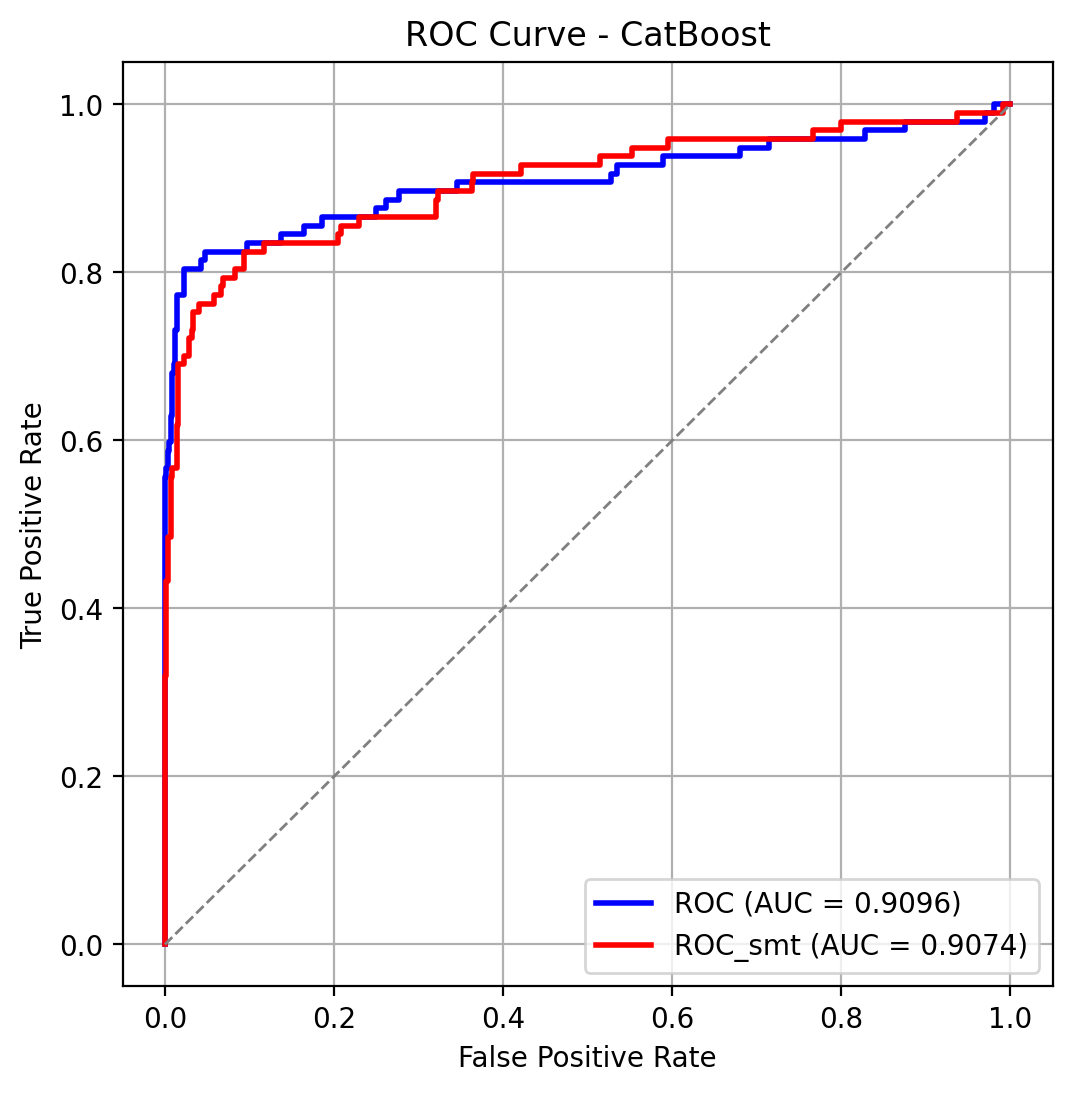

In [82]:

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC (AUC = {auc_score:.4f})')
plt.plot(fpr_smt, tpr_smt, color='red', lw=2, label=f'ROC_smt (AUC = {auc_score_smt:.4f})')
plt.plot([0,1], [0,1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - CatBoost')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Recall (also called sensitivity or true positive rate) measures:

$$\text{Recall} = \frac{\text{True Positives (TP)}}{\text{TP + False Negatives (FN)}}$$

- TP: Customers correctly predicted to churn
- FN: Actual churners that the model failed to identify

Interpretation: Recall tells us how many of the actual churners the model successfully detects. A high Recall means fewer churners are “missed.”


Why Recall Matters in Churn Prediction

- Preventing Revenue Loss
	- Each missed churner (FN) represents a potential lost revenue opportunity.
	- Identifying as many potential churners as possible enables timely retention interventions.
- Retention Campaign Effectiveness
	- Marketing or customer success teams often run targeted campaigns for at-risk customers.
	- Maximizing Recall ensures the campaigns reach most of the at-risk customers.

In short, missing a churner is more costly than incorrectly flagging a non-churner in many business contexts.

Practical Implications

- Customer churn prediction is a cost-sensitive, imbalanced classification problem.
    - The business impact of missing a churner (FN) is usually higher than misclassifying a non-churner (FP).
    - Therefore, Recall is the primary metric, and models are typically optimized to maximize it while keeping Precision within acceptable limits.

- In churn modeling:
    - Focus on Recall first → ensure the model captures as many churners as possible.
    - Then tune thresholds or adjust class weights to manage Precision.

## Next : Grid Search & Cross Validataion

#### TO DOs
- Apply Grid Search inside each CV fold (only on training fold) to avoid data leakage
- Systematically tests a set of hyperparameter combinations
- Include early stoppinng

#### Example hyperparameter grid:
```python
params = 
{
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'iterations': [200, 300, 500]
}
```

#### Process Order
1. Define hyperparameter grid
    - Specify the ranges of parameters to explore, e.g., learning_rate, depth, iterations.
2.	Cross-validation 
    - Split the training data into k folds (StratifiedKFold if imbalanced).
3.	Apply preprocessing inside each fold
    - For imbalanced datasets, apply SMOTE(NC) only on the ***training fold*** to avoid data leakage.
4.	Train CatBoost with early stopping
    - Train on the processed training fold.
    - Use early stopping to prevent overfitting and save computation.
5.	Evaluate on the validation fold
    - Compute metrics such as F1, Recall, Precision, ROC and AUC.
    - Optionally sweep thresholds for the minority class to optimize F1.
6.	Aggregate metrics across folds
    - Average metrics for each hyperparameter combination to get a robust estimate.
7.	Select the best hyperparameters
    - Choose the combination that maximizes the chosen metric (e.g., F1-score for minority class).
8.	Train final model on the full training set
    - Apply the selected hyperparameters and train on all training data.
9.	Evaluate final model on test set
    - Use untouched test data for an unbiased estimate of real-world performance.

# Next: SHAP (SHapley Additive exPlanations)
- https://shap.readthedocs.io

In [86]:
!conda install -y -c conda-forge shap

Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



In [87]:
import shap

shap.initjs()

In [98]:
model = model_smt

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_smt)

# visualize the first prediction's explanation
shap.plots.force(shap_values[1, ...])

In [90]:
# visualize the training set predictions
shap.plots.force(shap_values)

In [92]:
X_smt.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Many_service_calls'],
      dtype='object')

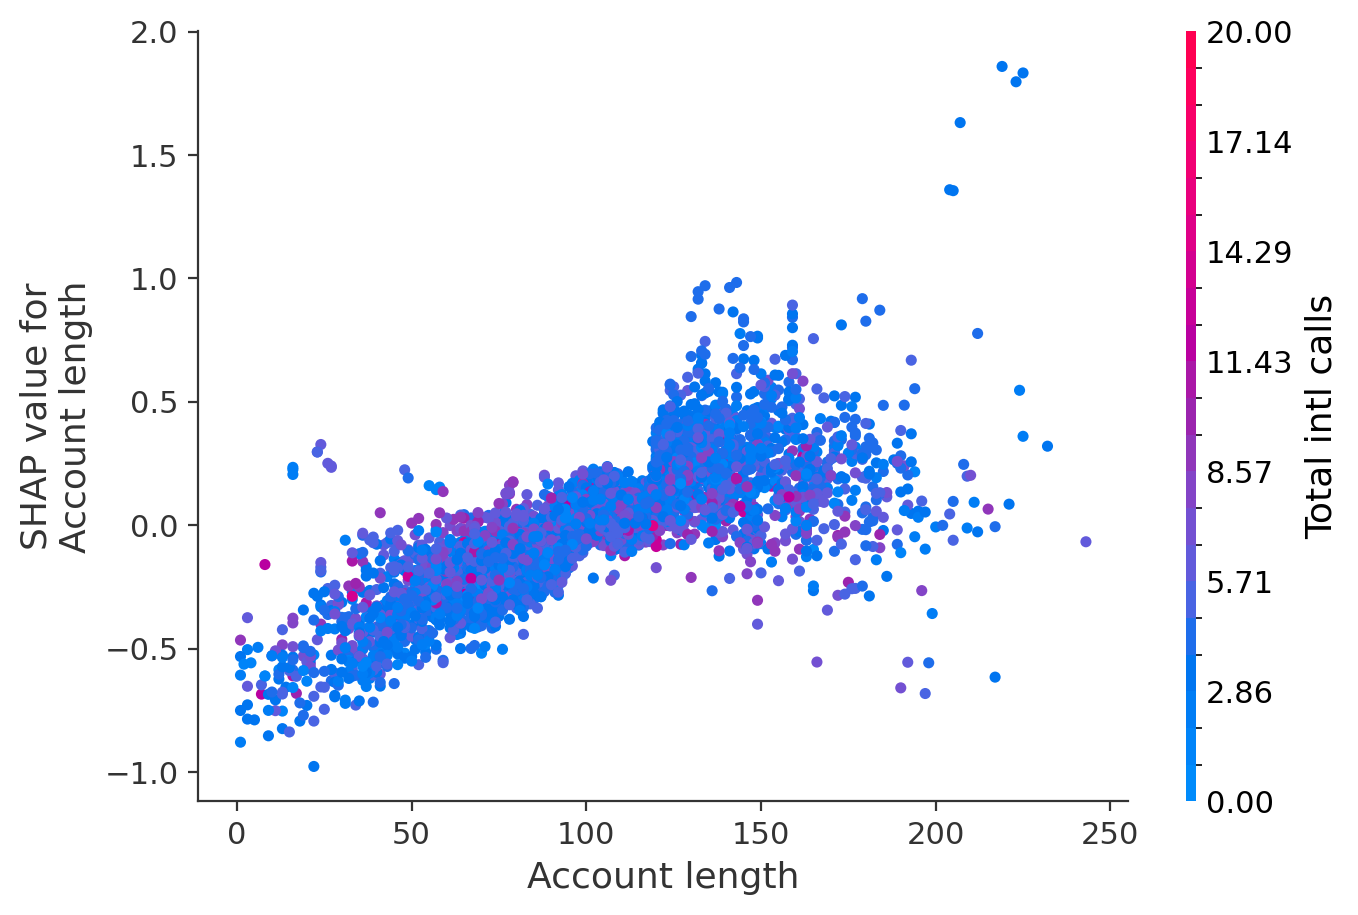

In [96]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("Account length", shap_values.values, X_smt, interaction_index="Total intl calls")

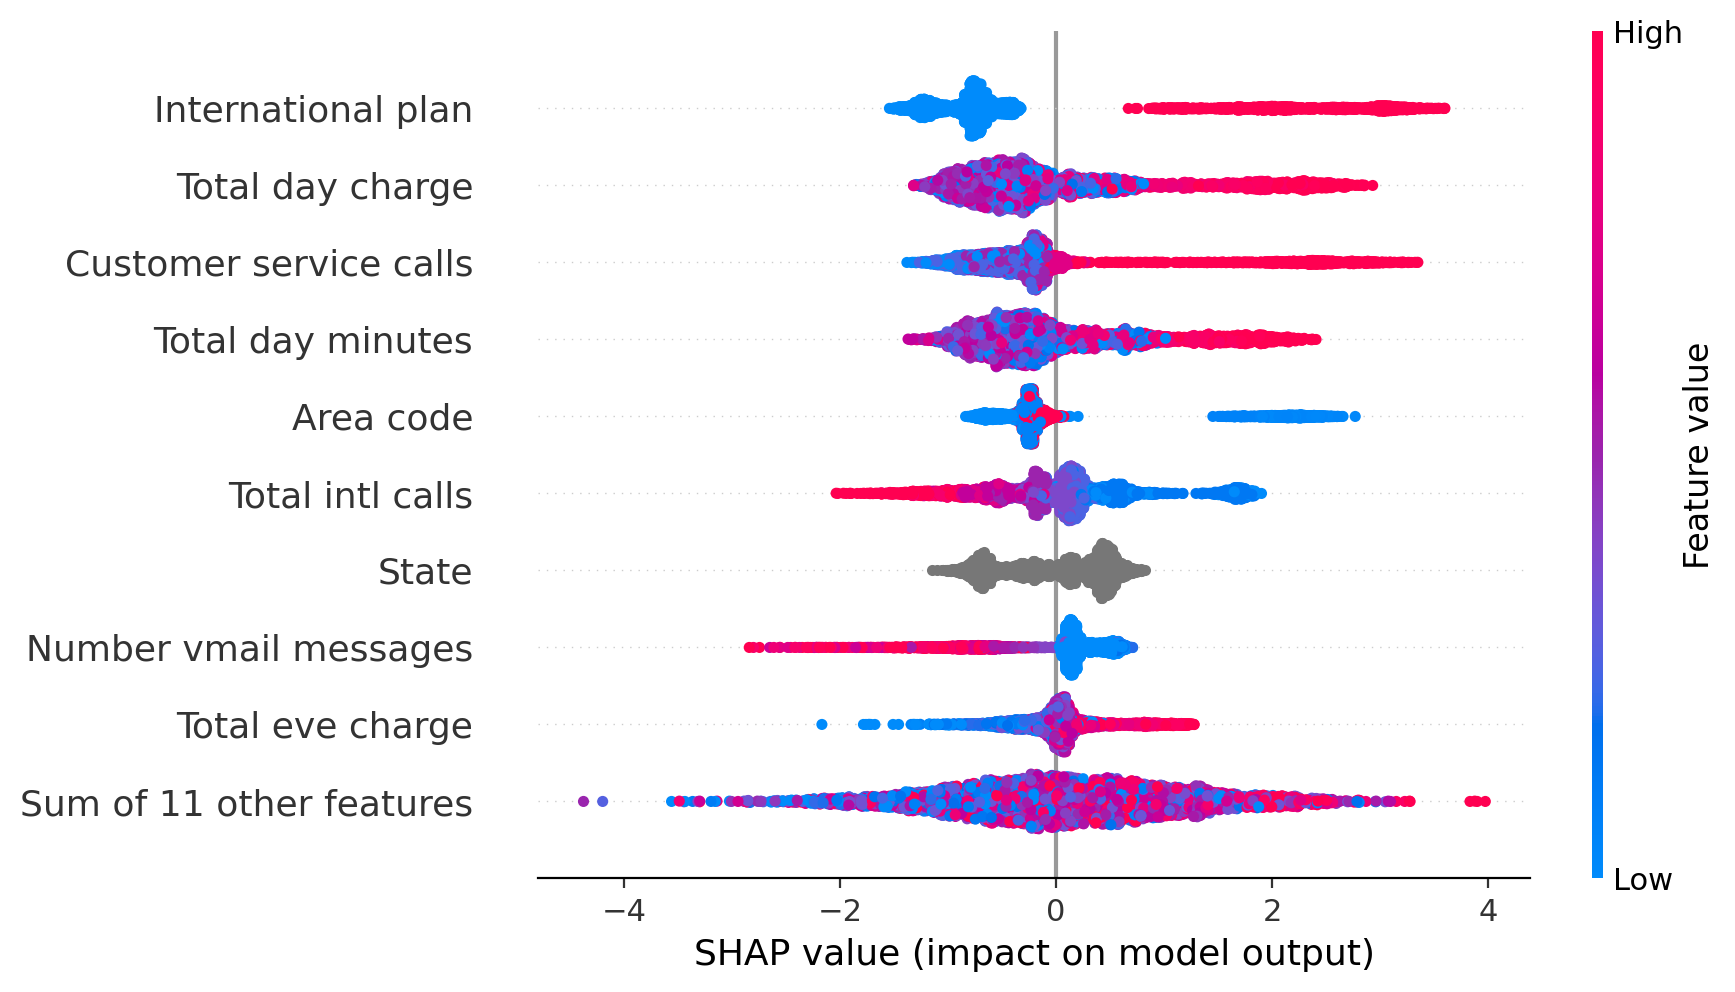

In [97]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)